<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

In [9]:
# Import Packages
from pathlib import Path
import pandas as pd
import numpy as np
import tarfile
import urllib.request

import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
import sys

assert sys.version_info >= (3, 7)

In [11]:


def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    
    data_path = Path("datasets/housing/housing.csv")
    return pd.read_csv(data_path), data_path.parent.resolve()

housing, data_directory = load_housing_data()

print(f"Data is saved in: {data_directory}")


housing , _ = load_housing_data()

Data is saved in: C:\Users\Lbundi\datasets\housing


In [13]:
# Display the first 5 rows
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


#### Exploratory Analysis 

- Is an approach to analyzing data set to summarize their main characterists , often using visual methods

EDA Involves

1. Understanding Data Structure
2. Descriptive Statistics
3. Data Visualization
4. Identifying Patterns and Relationships

#### Approches of EDA

1. Univariate Analysis
2. Bivariate Analysis
3. Multivariate Analysis

##### Univariate Analysis

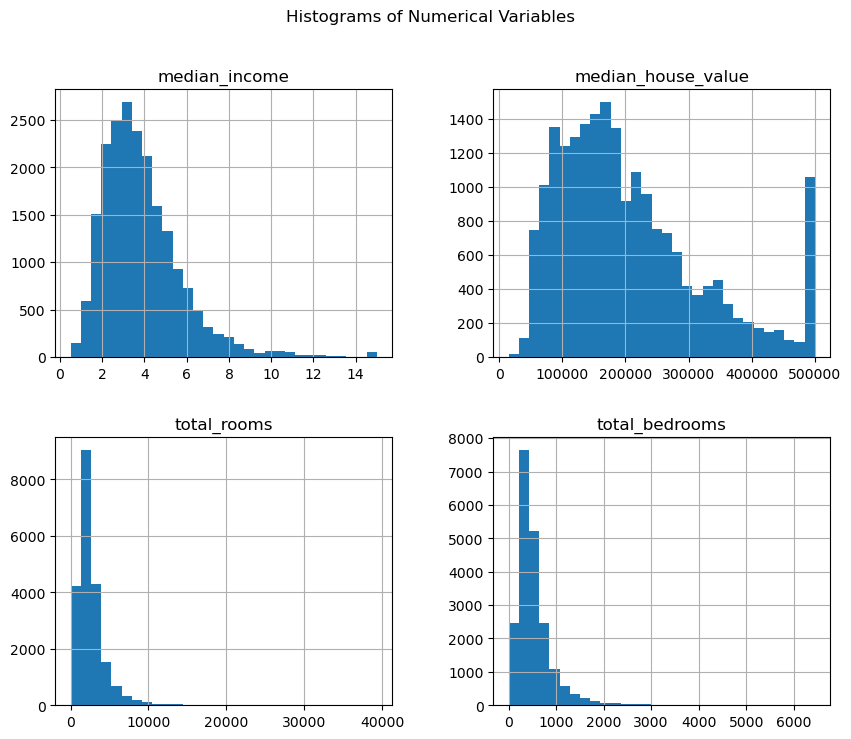

In [31]:
# Distribution plots

# Histograms for numerical variables
housing[['median_income', 'median_house_value', 'total_rooms', 'total_bedrooms']].hist(bins=30, figsize=(10, 8))
plt.suptitle('Histograms of Numerical Variables')
plt.show()

**Insights**

1.This histogram shows the distribution of **median incomes** across a dataset. It appears to be right-skewed, meaning there are more instances of lower median incomes with a tail extending towards higher incomes.

2. The distribution of median house values is also right-skewed, indicating more houses with lower values and a smaller number of very expensive houses.

3. Total Rooms: This histogram is also right-skewed suggesting a larger number of houses with fewer rooms and a decreasing number of houses with more rooms.
Total Bedrooms: Like the other histograms, the distribution of total bedrooms is right-skewed, with more houses having a lower number of bedrooms.

All four histograms exhibit right-skewed distributions, indicating that the data for each attribute tends to cluster towards lower values with fewer instances of higher values.

The shapes of the histograms suggest potential outliers or extreme values in the datasets, especially for median house value and total rooms.
The histograms provide a visual summary of the central tendency and dispersion of each attribute.


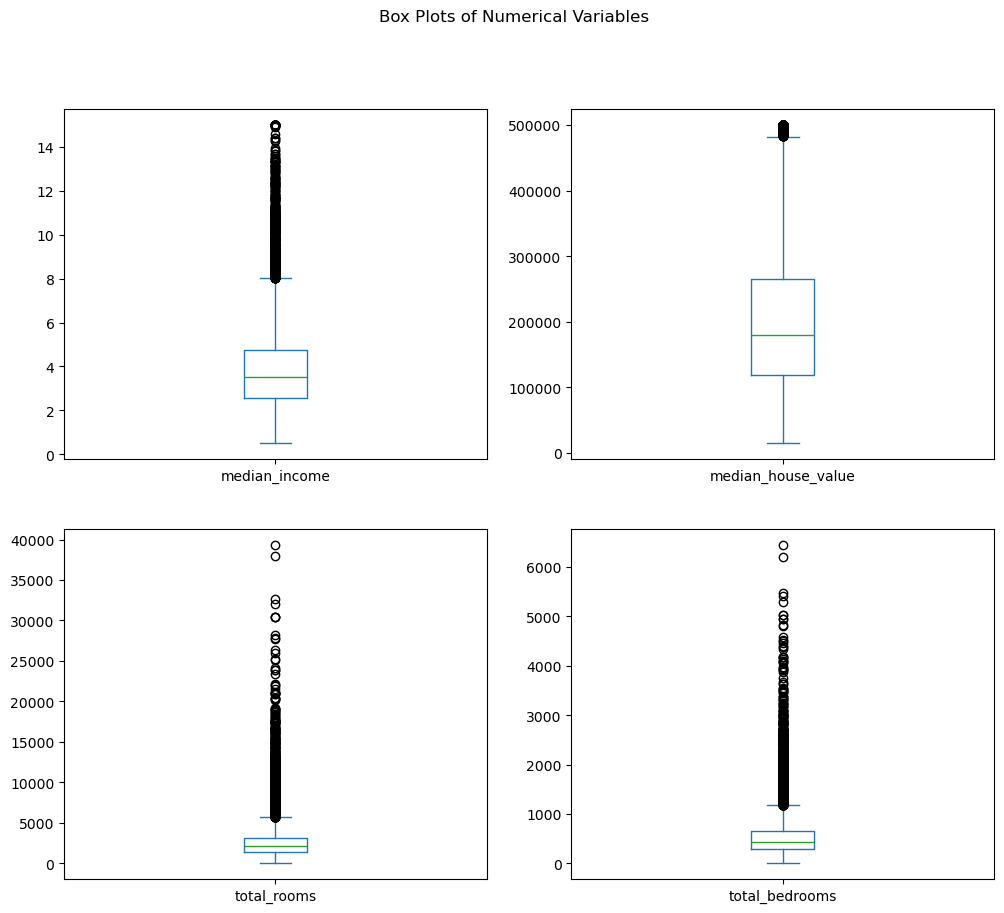

In [21]:
# Box plots for numerical variables
housing[['median_income', 'median_house_value', 'total_rooms', 'total_bedrooms']].plot(kind='box', subplots=True, layout=(2,2), figsize=(12, 10), title='Box Plots of Numerical Variables')
plt.show()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


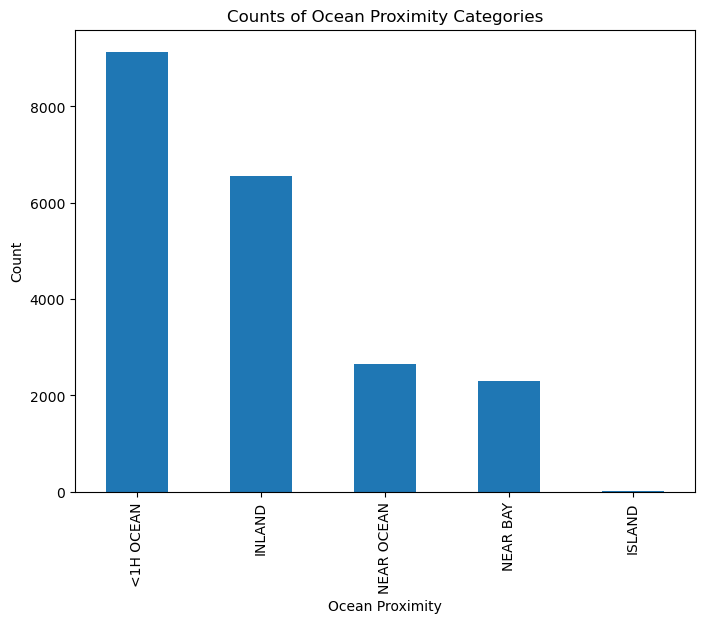

In [22]:
# Categorical Variable Distribution:


print(housing['ocean_proximity'].value_counts())

# Bar plot for categorical variable
housing['ocean_proximity'].value_counts().plot(kind='bar', figsize=(8, 6), title='Counts of Ocean Proximity Categories')
plt.xlabel('Ocean Proximity')
plt.ylabel('Count')
plt.show()

##### Bivariate Analysis

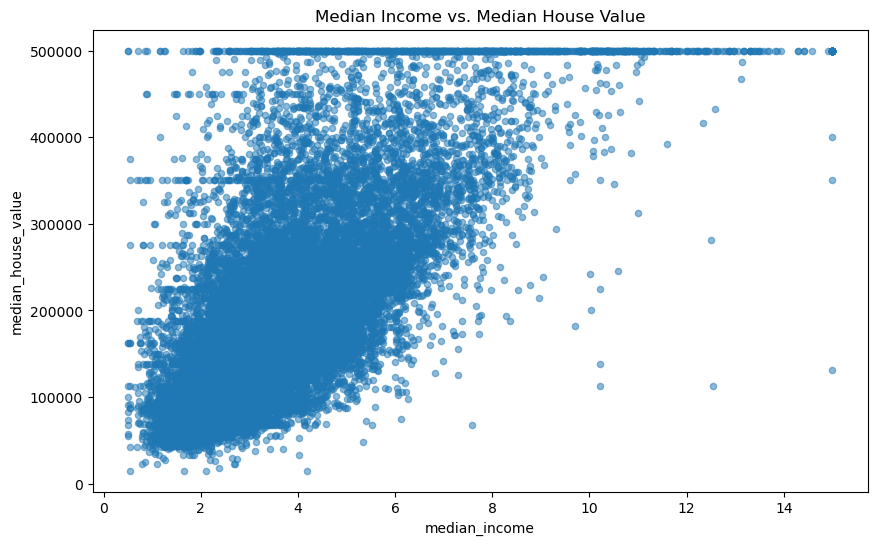

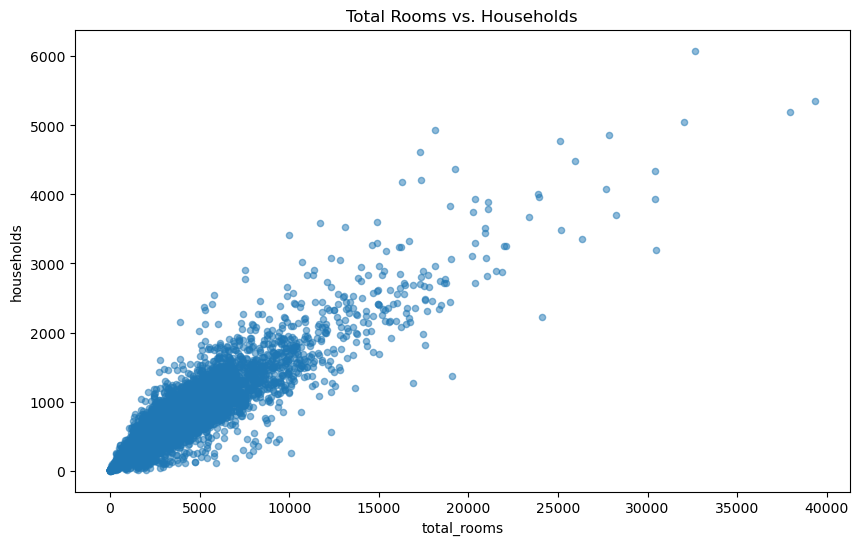

In [23]:
# Scatter plots for numerical vs. numerical relationships
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.5, figsize=(10, 6), title='Median Income vs. Median House Value')
plt.show()

housing.plot(kind='scatter', x='total_rooms', y='households', alpha=0.5, figsize=(10, 6), title='Total Rooms vs. Households')
plt.show()


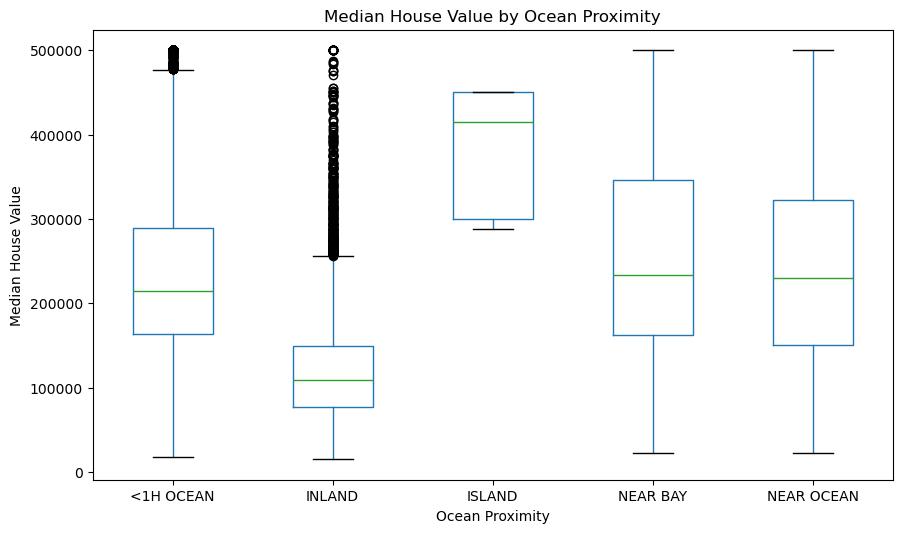

In [25]:
# Box plots for numerical variables by categorical variable

housing[['ocean_proximity', 'median_house_value']].boxplot(by='ocean_proximity', figsize=(10, 6), grid=False)
plt.title('Median House Value by Ocean Proximity')
plt.suptitle('')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.show()


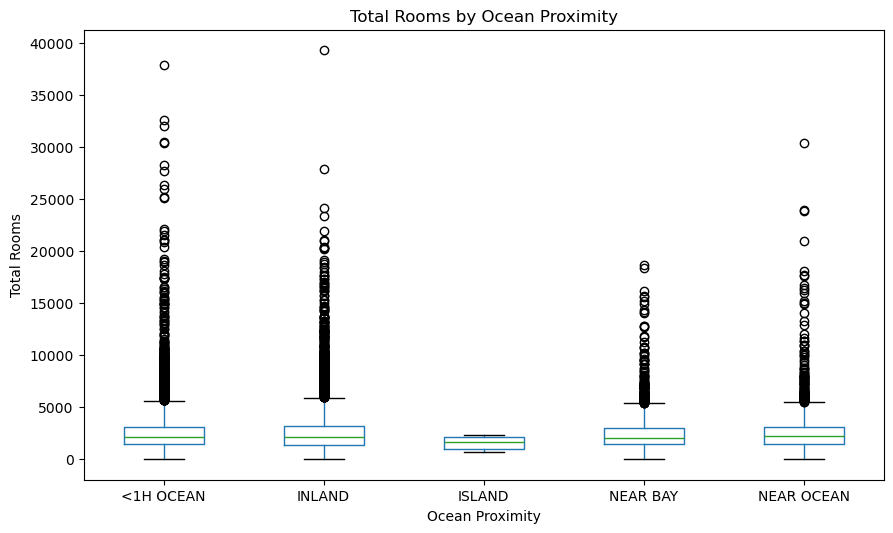

In [29]:
# Box plot of total_rooms by ocean_proximity
housing[['ocean_proximity', 'total_rooms']].boxplot(by='ocean_proximity', figsize=(10, 6), grid=False)
plt.title('Total Rooms by Ocean Proximity')
plt.suptitle('')
plt.xlabel('Ocean Proximity')
plt.ylabel('Total Rooms')
plt.show()

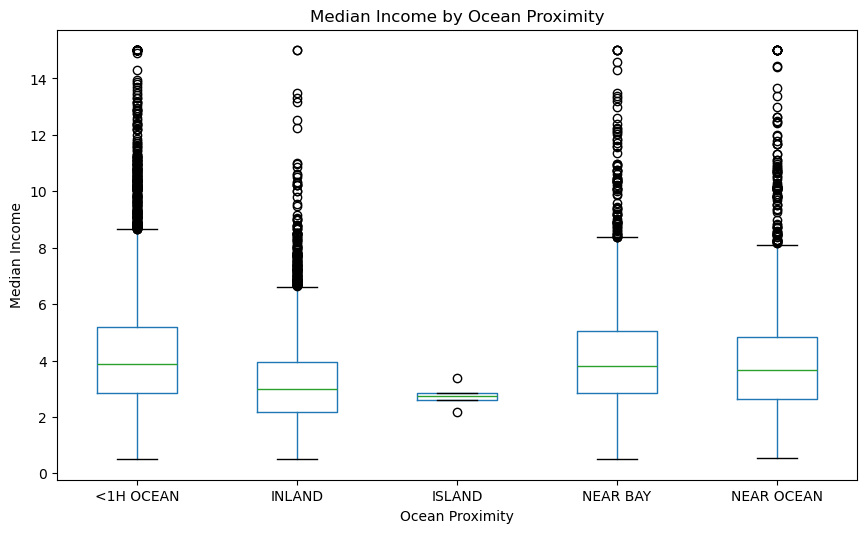

In [30]:
# Box plot of median_income by ocean_proximity

housing[['ocean_proximity', 'median_income']].boxplot(by='ocean_proximity', figsize=(10, 6), grid=False)
plt.title('Median Income by Ocean Proximity')
plt.suptitle('')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median Income')
plt.show()

##### Multivariate Analysis

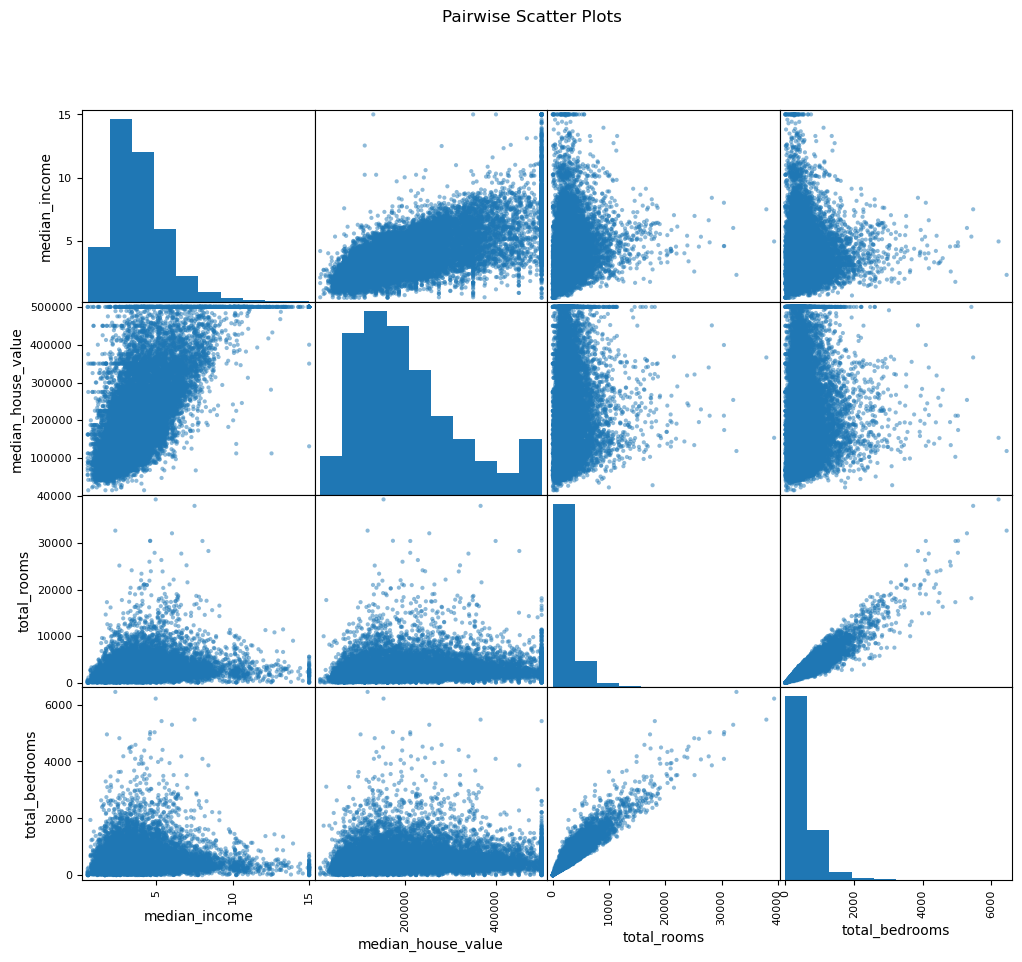

In [26]:
# Pairwise scatter plots
from pandas.plotting import scatter_matrix

scatter_matrix(housing[['median_income', 'median_house_value', 'total_rooms', 'total_bedrooms']], figsize=(12, 10), alpha=0.5)
plt.suptitle('Pairwise Scatter Plots')
plt.show()
